In [71]:
# Importation des bibliothèques principaless
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des fonctions de manipulation des données
from sklearn.datasets import load_diabetes, load_iris, make_blobs, load_digits
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, Binarizer, KBinsDiscretizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE, RFECV
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA


# Importation des métriques
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error

L'apprentissage non-supervisé est une méthode où l’algorithme apprend à partir de données sans étiquettes (c’est-à-dire sans réponse connue). L’objectif est de trouver des structures cachées ou des motifs dans les données. Les techniques courantes incluent :

- **Clustering** : regrouper les données similaires (ex : k-means).
- **Réduction de dimensionnalité** : simplifier les données tout en conservant l’essentiel (ex : PCA).

C’est utile pour explorer, visualiser ou prétraiter des données quand on ne connaît pas les réponses à l’avance.

## Clustering avec K-Means

Pour éviter les erreurs, on exécute l'algo plusieurs fois
On peut l'utiliser comme transformer(compliqué mais très intéressant)
D'autres algos à retenir: DBScan, AgglomerativeClustering

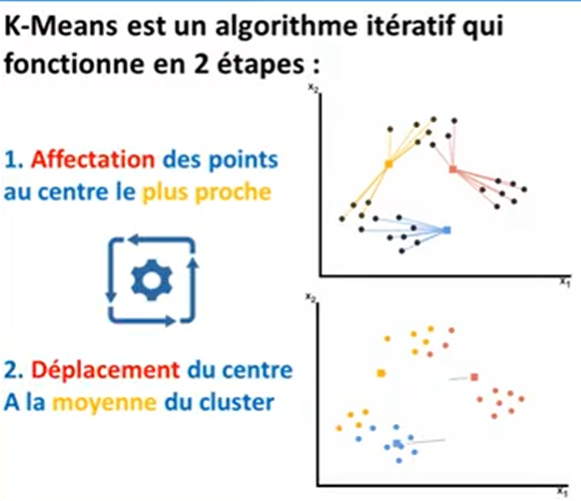
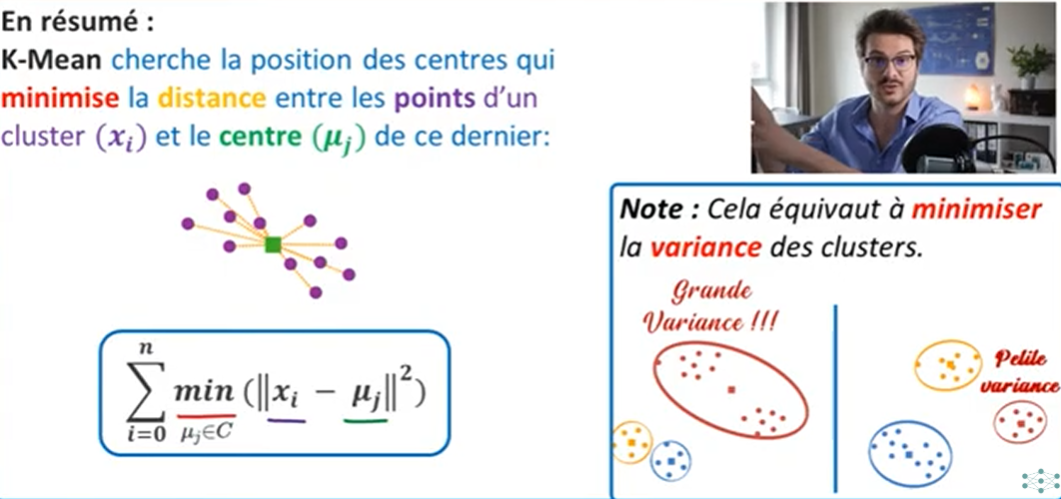

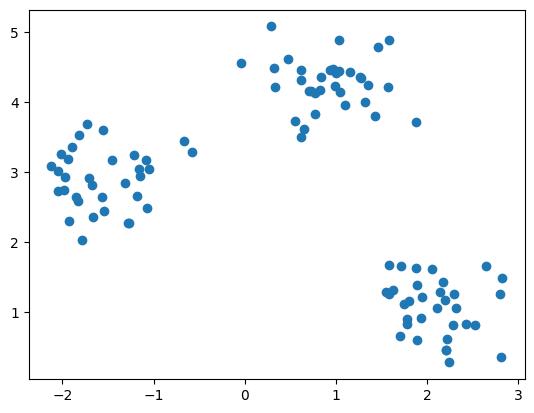

In [7]:
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

30.870531280140675

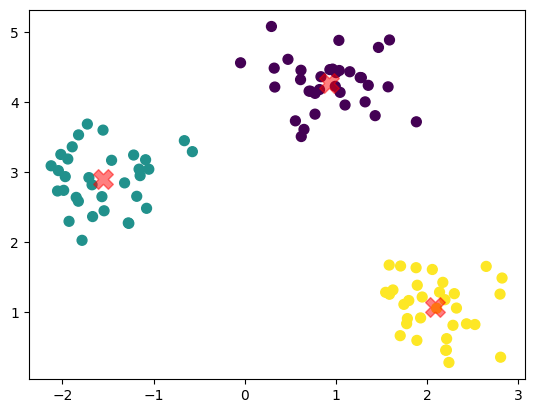

In [27]:
# Création du modèle(n_cluster=nopmbre de cluster, init=façon de placer les différents centroids à l'initialisation)

model = KMeans(n_clusters=3, init="k-means++")
model.fit(X)
#Permet de voir comment les données sont regroupées(labels_ and model make the same thing)
model.labels_
model.predict(X)
#Affichage des données classées par cluster
plt.scatter(X[:,0], X[:,1], c=model.labels_, s=50, cmap='viridis')
#Affichage des centroids
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='red', s=200, alpha=0.5, marker='X')
model.inertia_ # Est le coût du model (le taux d'erreur, comme la MSE pour la régression)

Afin de trouver le bon nombre de clusters et de centroids (un nombre raisonable)
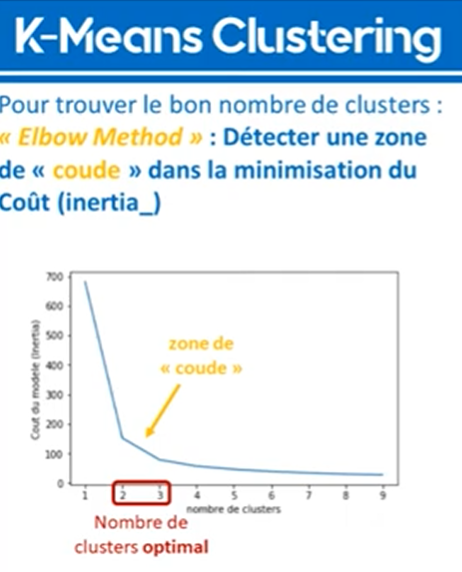

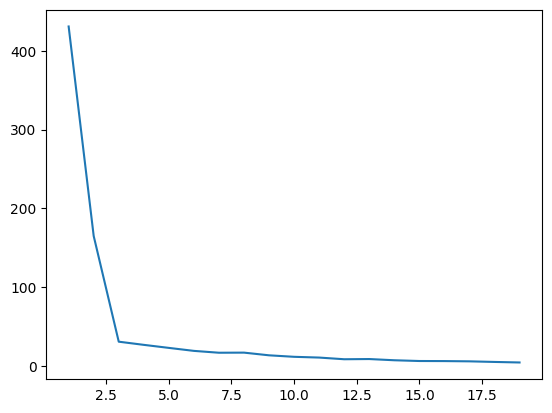

In [30]:
#Ce code permet de trouver le nombre de cluster optimal

inertia = []#Création d'une liste dans laquelle on va stocker les valeurs de l'inertie
K_range = range(1, 20)#Création d'une rangée de valeur de K que l'on va tester
for k in K_range:#On calcule l'inertie pour chaque valeur de K
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
inertia
plt.plot(K_range, inertia)#Affiche le graphique et permet de trouver le coude


## Anomaly Detedction with Isolation Forest

It's an algorithme for detecting the outliers in the train set

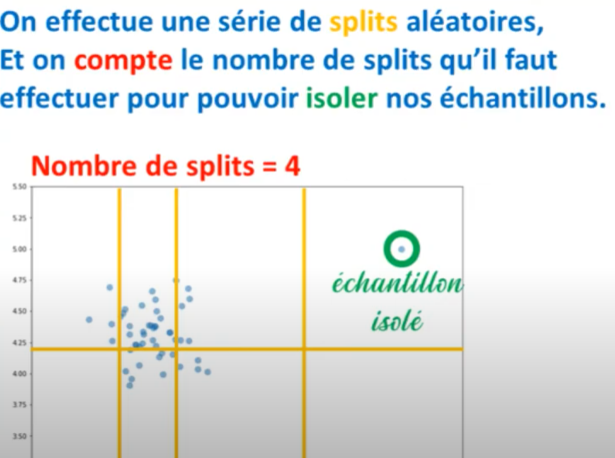

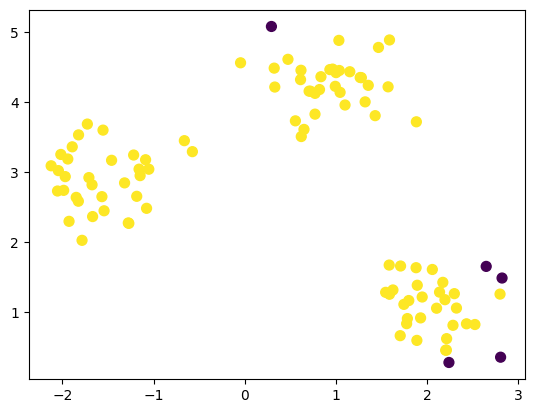

In [44]:
#Création du modèle d'Isolation Forest pour la détection d'anomalies(contamination=0.01(identifie 1% des déchets))
model = IsolationForest(contamination=0.05)
model.fit(X)
model.predict(X) # Prédictions des anomalies 1 pour les anomalies et -1 pour les données normales

plt.scatter(X[:,0], X[:,1], c=model.predict(X), s=50, cmap='viridis')

### Test de tri pour un dataset de chiffres
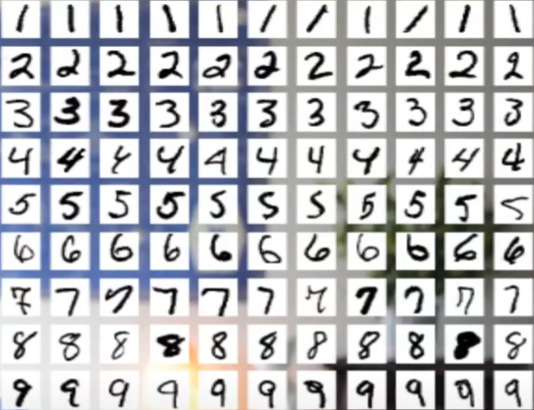

In [50]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)


(1797, 64)


In [ ]:
plt.imshow(images[0])

In [62]:
model = IsolationForest(contamination=0.02, random_state=0) # identifie 2% des déchets
model.fit(X) # Entraînement du modèle sur les données(images)
predictions = model.predict(X) # Prédictions des anomalies 1 pour les anomalies et -1 pour les données normales

(1797,)


Text(0.5, 1.0, '2')

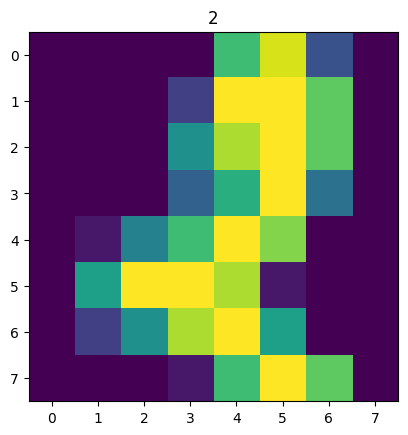

In [70]:
#Filtrer
outliers = predictions == -1 # Sélection des anomalies
print(outliers.shape)
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

### Local Outlier Factor
à aller voir

Novelty detection: détecte les anomalies dans les donées futures (test set)

## PCA : Réduction de dimension 

!! Les données doivent être standardisées avant

Pas pour data in onehot ni pour datasets non-linéaires

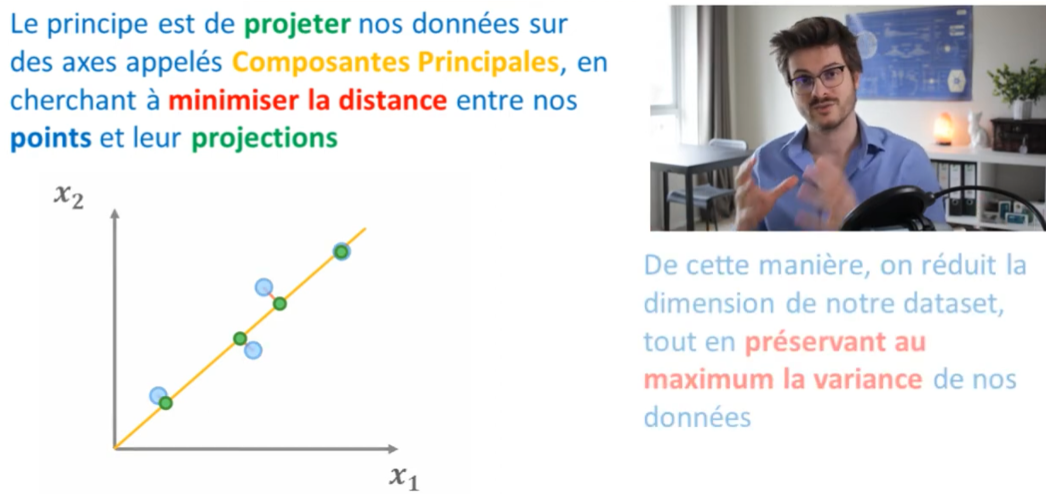

In [73]:
model = PCA(n_components=10) # Réduction de la dimensionnalité à 10 composantes principales
model.fit_transform(X) # Réduction de la dimensionnalité des données


array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.55347036,
          0.58184214,  -3.62569695],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.61593641,
         -3.58745013,   1.07470456],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  16.41519983,
         -0.7192329 ,  -4.25580548],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   7.4150719 ,
          3.96158533,  13.06509519],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   4.35789156,
         -3.93924173,  13.14525475],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.66902071,
          4.11316505,  12.56200443]])

#### Choix du n_components
1) 
    - Si l'on visualise donnée en 2D ou 3D alors n_components = 2 ou 3
2)
    - Si l'on veut réduire au maximum le dataset (gain de temps) mais garder 95 à 99% de variance


### 1) Visualisation

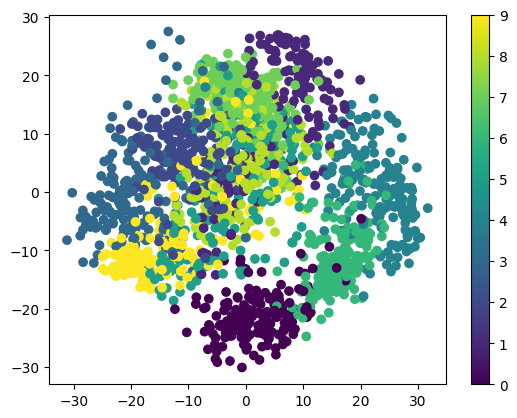

In [81]:
model = PCA(n_components=2)
X_reduced = model.fit_transform(X)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

### 2) Réduire le dataset pour gagner du temps

#### Première solution

In [85]:
model = PCA(n_components=64)
X_reduced = model.fit_transform(X)

model.explained_variance_ratio_ # Affiche la variance expliquée par chaque composante principale
#On choisit à partir d'un certain seuil de variance expliquée, par exemple 95%
np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.99)

40

#### Deuxième solution

In [86]:
model = PCA(n_components=0.99) # Réduction de la dimensionnalité en conservant 99% de la variance
X_reduced = model.fit_transform(X)
model.n_components_ # Affiche le nombre de composantes principales retenues

41